## 3. Exploratory Data Analysis ##

#### Index ####

- Statistical Hypothesis Testing
- Correlation Tests
- Feature Selection
- Data Modelling

In [4]:
#!pip install plotly

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import chart_studio.plotly as py
#import chart_studio.plotly.graph_objs as go
from collections import Counter
from statistics import stdev, mean
import operator

In [13]:
class Exploratory_data_analysis():
    def __init__(self):
        print("Imported functions from exploratory_data_analysis notebook")

We are more interested in the schools that fall under these categories - 'Standard Exceeded' vs 'Standard Not Met'. This will help us determine which school would need recommendation/help to improve.

In [15]:
target_col = 'Percentage Standard Exceeded'

In [16]:
#global variables
ops = {'>': operator.gt, '<': operator.lt, '>=': operator.ge, '<=': operator.le, '=': operator.eq}
attr_avg_score = ['Target_Avg_Percentage Standard Exceeded', 'Target_Avg_Percentage Standard Met', 'Target_Avg_Percentage Standard Nearly Met', 'Target_Avg_Percentage Standard Not Met']

In [17]:
df = pd.read_csv('cleaned_school_df.csv', sep='\t', encoding='utf-8')
df.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
df.head()

,Demographic ID,Demographic Name,Student Group,County Code,District Code,School Code,Grade,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,...,Physical Sciences Domain Percent Near Standard,Physical Sciences Domain Percent Above Standard,Earth and Space Sciences Domain Percent Below Standard,Earth and Space Sciences Domain Percent Near Standard,Earth and Space Sciences Domain Percent Above Standard,County Name,District Name,School Name,Zip Code,Median
0,1,All Students,All Students,2,61333,6002794,5,9.09,18.18,63.64,...,54.55,9.09,36.36,63.64,0.00,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
1,1,All Students,All Students,2,61333,6002794,13,9.52,33.33,52.38,...,57.14,14.29,33.33,42.86,23.81,Alpine,Alpine County Unified,Diamond Valley Elementary,96120,3042249.5
2,1,All Students,All Students,6,61622,118729,5,0.94,10.38,55.66,...,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
3,1,All Students,All Students,6,61622,118729,13,0.94,10.38,55.66,...,34.29,0.95,62.26,35.85,1.89,Colusa,Williams Unified,Williams Upper Elementary,95987,692087.0
4,1,All Students,All Students,6,61622,637504,8,0.00,3.96,45.54,...,22.34,0.00,75.82,24.18,0.00,Colusa,Williams Unified,Williams Junior/Senior High,95987,692087.0


### 'Number of Students with Scores' based on different groups ###

In [21]:
df_studentNum = pd.pivot_table(df, index=['School Code', 'Student Group', 'Demographic Name'], values=['Total Number of Students with Valid Scores'])
df_studentNum.reset_index(inplace=True)
df_studentNum.head()

,School Code,Student Group,Demographic Name,Total Number of Students with Valid Scores
0,100537,All Students,All Students,218.000000
1,100537,Disability Status,Students with disability,23.000000
2,100537,Disability Status,Students with no reported disability,199.333333
3,100537,Economic Status,Economically disadvantaged,183.333333
4,100537,Economic Status,Not economically disadvantaged,34.666667


In [23]:
df_studentNum_pivot_table = df_studentNum.pivot_table(values='Total Number of Students with Valid Scores', index='School Code', columns=['Student Group', 'Demographic Name'], aggfunc='mean', fill_value=0)
df_studentNum_pivot_table.head()

Student Group    All Students        Disability Status  \
Demographic Name All Students Students with disability   
School Code                                              
100537             218.000000                     23.0   
102301             104.666667                     15.0   
106013             186.666667                      0.0   
106807             172.000000                     20.0   
107318              60.000000                      0.0   

Student Group                                          \
Demographic Name Students with no reported disability   
School Code                                             
100537                                     199.333333   
102301                                      93.333333   
106013                                     180.000000   
106807                                     152.000000   
107318                                      55.333333   

Student Group               Economic Status                                 \
Demographic Name Economically disadvantaged Not economically disadvantaged   
School Code                                                                  
100537                           183.333333                      34.666667   
102301                            88.666667                      20.500000   
106013                            38.666667                     148.000000   
106807                            59.000000                     113.000000   
107318                            22.666667                      37.333333   

Student Group    English-Language Fluency  \
Demographic Name          English learner   
School Code                                 
100537                          39.333333   
102301                          42.666667   
106013                           0.000000   
106807                           0.000000   
107318                           0.000000   

Student Group                                                                       \
Demographic Name English learners enrolled in school in the U.S. 12 months or more   
School Code                                                                          
100537                                                    36.666667                  
102301                                                    42.000000                  
106013                                                     0.000000                  
106807                                                     0.000000                  
107318                                                     0.000000                  

Student Group                              \
Demographic Name English only    Ever-ELs   
School Code                                 
100537              76.666667  129.333333   
102301              39.333333   64.000000   
106013             172.666667   13.000000   
106807             123.000000   46.000000   
107318              48.000000   16.000000   

Student Group                                                ...  \
Demographic Name Fluent English proficient and English only  ...   
School Code                                                  ...   
100537                                           178.666667  ...   
102301                                            62.000000  ...   
106013                                           184.666667  ...   
106807                                           162.000000  ...   
107318                                            56.000000  ...   

Student Group    Homeless Status           Migrant Military Status  \
Demographic Name    Not Homeless Migrant education        Military   
School Code                                                          
100537                218.000000         25.333333               0   
102301                 96.000000          0.000000               0   
106013                185.333333          0.000000               0   
106807                171.000000          0.000000               0   
107318 

In [24]:
# concatenate all columns names
def concat_col_names(pivot_table, pre="", post=""):
    cols = pivot_table.columns.values.tolist()
    col_list=[]
    for c in cols:
        col_list.append(pre+"_".join(c)+post)
    pivot_table.columns = col_list       
    pivot_table.fillna(0)

In [25]:
concat_col_names(df_studentNum_pivot_table, pre="Num_")   
df_studentNum_pivot_table.head()

,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,Num_English-Language Fluency_Fluent English proficient and English only,...,Num_Homeless Status_Not Homeless,Num_Migrant_Migrant education,Num_Military Status_Military,Num_Military Status_Not Military,Num_Parent Education_College graduate,Num_Parent Education_Declined to state,Num_Parent Education_Graduate school/Post graduate,Num_Parent Education_High school graduate,Num_Parent Education_Not a high school graduate,Num_Parent Education_Some college (includes AA degree)
School Code,,,,,,,,,,,,,,,,,,,,,
100537,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,178.666667,...,218.000000,25.333333,0,217.333333,41.333333,12.0,13.500000,98.666667,19.333333,40.000000
102301,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,62.000000,...,96.000000,0.000000,0,104.666667,0.000000,18.5,0.000000,28.000000,26.666667,38.000000
106013,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,184.666667,...,185.333333,0.000000,0,185.333333,76.666667,0.0,69.333333,0.000000,0.000000,30.666667
106807,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,162.000000,...,171.000000,0.000000,0,172.000000,61.000000,0.0,47.000000,23.000000,16.000000,25.000000
107318,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,56.000000,...,60.000000,0.000000,0,60.000000,20.500000,0.0,12.000000,15.000000,0.000000,21.333333


In [31]:
#Calculate the percentage variables
for col in df_studentNum_pivot_table.columns:
    if "Num_" in col:
        pct = (df_studentNum_pivot_table[col]/df_studentNum_pivot_table["Num_All Students_All Students"]).replace(np.inf, 0)*100
        df_studentNum_pivot_table["Pct_"+col.strip("Num_")] = pct.round(2)
        
df_studentNum_pivot_table.head()

,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,Num_English-Language Fluency_Fluent English proficient and English only,...,Pct_Homeless Status_Not Homeless,Pct_Migrant_Migrant education,Pct_Military Status_Military,Pct_Military Status_Not Military,Pct_Parent Education_College graduate,Pct_Parent Education_Declined to state,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree)
School Code,,,,,,,,,,,,,,,,,,,,,
100537,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,178.666667,...,100.00,11.62,0.0,99.69,18.96,5.50,6.19,45.26,8.87,18.35
102301,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,62.000000,...,91.72,0.00,0.0,100.00,0.00,17.68,0.00,26.75,25.48,36.31
106013,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,184.666667,...,99.29,0.00,0.0,99.29,41.07,0.00,37.14,0.00,0.00,16.43
106807,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,162.000000,...,99.42,0.00,0.0,100.00,35.47,0.00,27.33,13.37,9.30,14.53
107318,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,56.000000,...,100.00,0.00,0.0,100.00,34.17,0.00,20.00,25.00,0.00,35.56


In [32]:
df_studentNum_pivot_table.shape

(157, 80)

Let's club student ethinicity into broad categories, such as  

In [39]:
df_studentNum_pivot_table.columns

Index(['Num_All Students_All Students',
       'Num_Disability Status_Students with disability',
       'Num_Disability Status_Students with no reported disability',
       'Num_Economic Status_Economically disadvantaged',
       'Num_Economic Status_Not economically disadvantaged',
       'Num_English-Language Fluency_English learner',
       'Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more',
       'Num_English-Language Fluency_English only',
       'Num_English-Language Fluency_Ever-ELs',
       'Num_English-Language Fluency_Fluent English proficient and English only',
       'Num_English-Language Fluency_Initial fluent English proficient (IFEP)',
       'Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)',
       'Num_Ethnicity_American Indian or Alaska Native', 'Num_Ethnicity_Asian',
       'Num_Ethnicity_Filipino', 'Num_Ethnicity_Hispanic or Latino',
       'Num_Ethnicity_Two or more races', 'Num_Ethnicity_Whi

### 2. Median Home Prices ###

In [40]:
df_houseprice = pd.pivot_table(df, index=['School Code'], values=['Median'])
df_houseprice.head()

,Median
School Code,
100537,596649.0
102301,456240.0
106013,654232.0
106807,875819.0
107318,921737.5


### 3. Test Score (Dependent Variable) ###

In [42]:
attr_score = ['Percentage Standard Exceeded', 'Percentage Standard Met', 'Percentage Standard Nearly Met', 'Percentage Standard Not Met']
df_scores = pd.pivot_table(data=df, index=['School Code', 'Demographic Name', 'Student Group'], values=attr_score, aggfunc='mean', fill_value=0)
df_scores.reset_index(inplace=True)
df_scores.head()

,School Code,Demographic Name,Student Group,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
0,100537,All Students,All Students,4.940000,21.156667,57.636667,16.263333
1,100537,Asian,Ethnicity,5.503333,25.483333,54.296667,14.720000
2,100537,Asian,Ethnicity for Economically Disadvantaged,5.363333,24.340000,53.513333,16.783333
3,100537,Asian,Ethnicity for Not Economically Disadvantaged,2.780000,32.050000,65.170000,0.000000
4,100537,College graduate,Parent Education,7.526667,25.666667,59.273333,7.526667


In [45]:
df_all_scores = df_scores.loc[(df_scores['Demographic Name'] == 'All Students') & (df_scores['Student Group'] == 'All Students')]
df_scores_pivot_table = df_all_scores.pivot_table(values=attr_score, index='School Code', columns=['Student Group', 'Demographic Name'])
df_scores_pivot_table.head()

,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
Student Group,All Students,All Students,All Students,All Students
Demographic Name,All Students,All Students,All Students,All Students
School Code,,,,
100537,4.94,21.156667,57.636667,16.263333
102301,3.40,10.380000,58.000000,28.216667
106013,26.52,38.663333,31.406667,3.413333
106807,19.77,32.560000,41.860000,5.810000
107318,3.33,27.776667,51.110000,17.776667


In [47]:
concat_col_names(df_scores_pivot_table)
df_scores_pivot_table.head()

,Percentage Standard Exceeded_All Students_All Students,Percentage Standard Met_All Students_All Students,Percentage Standard Nearly Met_All Students_All Students,Percentage Standard Not Met_All Students_All Students
School Code,,,,
100537,4.94,21.156667,57.636667,16.263333
102301,3.40,10.380000,58.000000,28.216667
106013,26.52,38.663333,31.406667,3.413333
106807,19.77,32.560000,41.860000,5.810000
107318,3.33,27.776667,51.110000,17.776667


Rename the columns as the target columnsand lets collapse the columns that meets and exceeds the standard.

In [48]:
df_scores_pivot_table = df_scores_pivot_table.rename(columns = {col: col.replace("_All Students", "") for col in df_scores_pivot_table.columns})
df_scores_pivot_table.columns = ["Target_"+ col for col in df_scores_pivot_table.columns]
df_scores_pivot_table['Target_Met_Exceeded'] = df_scores_pivot_table['Target_Percentage Standard Exceeded'] + df_scores_pivot_table['Target_Percentage Standard Met']

In [51]:
df_scores_pivot_table.head()

,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
School Code,,,,,
100537,4.94,21.156667,57.636667,16.263333,26.096667
102301,3.40,10.380000,58.000000,28.216667,13.780000
106013,26.52,38.663333,31.406667,3.413333,65.183333
106807,19.77,32.560000,41.860000,5.810000,52.330000
107318,3.33,27.776667,51.110000,17.776667,31.106667


### 4. Merging all the dataframes ###

In [57]:
from functools import reduce

In [115]:
dfs = [df_studentNum_pivot_table, df_houseprice, df_scores_pivot_table]
df_schools = reduce(lambda left,right: pd.merge(left,right,on=['School Code']), dfs)
df_schools.head()

,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,Num_English-Language Fluency_Fluent English proficient and English only,...,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
School Code,,,,,,,,,,,,,,,,,,,,,
100537,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,178.666667,...,6.19,45.26,8.87,18.35,596649.0,4.94,21.156667,57.636667,16.263333,26.096667
102301,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,62.000000,...,0.00,26.75,25.48,36.31,456240.0,3.40,10.380000,58.000000,28.216667,13.780000
106013,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,184.666667,...,37.14,0.00,0.00,16.43,654232.0,26.52,38.663333,31.406667,3.413333,65.183333
106807,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,162.000000,...,27.33,13.37,9.30,14.53,875819.0,19.77,32.560000,41.860000,5.810000,52.330000
107318,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,56.000000,...,20.00,25.00,0.00,35.56,921737.5,3.33,27.776667,51.110000,17.776667,31.106667


In [116]:
df_schools.reset_index(inplace=True)
df_schools.head()

,School Code,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,...,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
0,100537,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,...,6.19,45.26,8.87,18.35,596649.0,4.94,21.156667,57.636667,16.263333,26.096667
1,102301,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,...,0.00,26.75,25.48,36.31,456240.0,3.40,10.380000,58.000000,28.216667,13.780000
2,106013,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,...,37.14,0.00,0.00,16.43,654232.0,26.52,38.663333,31.406667,3.413333,65.183333
3,106807,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,...,27.33,13.37,9.30,14.53,875819.0,19.77,32.560000,41.860000,5.810000,52.330000
4,107318,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,...,20.00,25.00,0.00,35.56,921737.5,3.33,27.776667,51.110000,17.776667,31.106667


In [117]:
#groupby to make a dataframe (as_index=False)
df_schools_names = df.groupby(["School Code", "School Name", "District Name", "County Name"], as_index=False).mean().round(2)
df_schools_names = df_schools_names.loc[:, ["School Code", "School Name", "District Name", "County Name"]]
df_schools_names.head()

,School Code,School Name,District Name,County Name
0,100537,Andros Karperos,Yuba City Unified,Sutter
1,102301,Woodson Elementary,Corning Union Elementary,Tehama
2,106013,University Preparatory,University Preparatory,Shasta
3,106807,Alder Creek Middle,Tahoe-Truckee Unified,Placer
4,107318,Twin Rivers Charter,Twin Rivers Charter,Sutter


In [118]:
df_schools_names_all = pd.merge(df_schools_names, df_schools, how='left', on="School Code")
df_schools_names_all.head()

,School Code,School Name,District Name,County Name,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,...,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
0,100537,Andros Karperos,Yuba City Unified,Sutter,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,...,6.19,45.26,8.87,18.35,596649.0,4.94,21.156667,57.636667,16.263333,26.096667
1,102301,Woodson Elementary,Corning Union Elementary,Tehama,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,...,0.00,26.75,25.48,36.31,456240.0,3.40,10.380000,58.000000,28.216667,13.780000
2,106013,University Preparatory,University Preparatory,Shasta,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,...,37.14,0.00,0.00,16.43,654232.0,26.52,38.663333,31.406667,3.413333,65.183333
3,106807,Alder Creek Middle,Tahoe-Truckee Unified,Placer,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,...,27.33,13.37,9.30,14.53,875819.0,19.77,32.560000,41.860000,5.810000,52.330000
4,107318,Twin Rivers Charter,Twin Rivers Charter,Sutter,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,...,20.00,25.00,0.00,35.56,921737.5,3.33,27.776667,51.110000,17.776667,31.106667


### Missing value imputation ###

We could use a simple imputer to fill in the missing values and use the strategy as median, so the values are not affected by the outliers.

In [119]:
from sklearn.impute import SimpleImputer

def replace_missing_value(df, number_features):

    imputer = SimpleImputer(strategy = 'median')
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [120]:
df_schools = replace_missing_value(df_schools, df_schools.columns)
df_schools

,School Code,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,...,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
0,100537.0,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,...,6.19,45.26,8.87,18.35,596649.0,4.940000,21.156667,57.636667,16.263333,26.096667
1,102301.0,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,...,0.00,26.75,25.48,36.31,456240.0,3.400000,10.380000,58.000000,28.216667,13.780000
2,106013.0,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,...,37.14,0.00,0.00,16.43,654232.0,26.520000,38.663333,31.406667,3.413333,65.183333
3,106807.0,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,...,27.33,13.37,9.30,14.53,875819.0,19.770000,32.560000,41.860000,5.810000,52.330000
4,107318.0,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,...,20.00,25.00,0.00,35.56,921737.5,3.330000,27.776667,51.110000,17.776667,31.106667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,6112486.0,13.000000,0.0,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.00,456240.0,0.000000,15.380000,61.540000,23.080000,15.380000
153,6113062.0,94.000000,14.0,80.000000,14.000000,80.000000,0.000000,0.000000,86.000000,0.000000,...,34.04,0.00,0.00,20.21,875819.0,27.660000,29.790000,36.170000,6.380000,57.450000
154,6113260.0,28.000000,0.0,26.000000,18.000000,0.000000,0.000000,0.000000,28.000000,0.000000,...,0.00,0.00,0.00,53.57,2451077.0,7.140000,32.140000,57.140000,3.570000,39.280000
155,6117857.0,93.333333,17.0,82.000000,31.333333,62.000000,0.000000,0.000000,91.333333,0.000000,...,15.54,12.86,0.00,46.43,462127.0,10.666667,22.863333,54.320000,12.150000,33.530000


In [121]:
df_schools.head()

,School Code,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,...,Pct_Parent Education_Graduate school/Post graduate,Pct_Parent Education_High school graduate,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded
0,100537.0,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,...,6.19,45.26,8.87,18.35,596649.0,4.94,21.156667,57.636667,16.263333,26.096667
1,102301.0,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,...,0.00,26.75,25.48,36.31,456240.0,3.40,10.380000,58.000000,28.216667,13.780000
2,106013.0,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,...,37.14,0.00,0.00,16.43,654232.0,26.52,38.663333,31.406667,3.413333,65.183333
3,106807.0,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,...,27.33,13.37,9.30,14.53,875819.0,19.77,32.560000,41.860000,5.810000,52.330000
4,107318.0,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,...,20.00,25.00,0.00,35.56,921737.5,3.33,27.776667,51.110000,17.776667,31.106667


In [128]:
def getPerformedSchools(df, score_attr, percent):
    df_level = df.loc[df[score_attr] > percent]
    level_index = df_level.index
    df_level = pd.merge(df_schools_names, df_level, how='right', on="School Code")
    print("The number of schools that ['{}' {} {}] is {}.".format(score_attr, '>', percent, df_level.shape[0]))
    return df_level, level_index

In [248]:
df_schools["Rank_4"] = df_schools["Target_Percentage Standard Exceeded"].rank(ascending=False) # creating a rank column and passing the returned rank series 
df_schools["Rank_1"] = df_schools["Target_Percentage Standard Not Met"].rank(ascending=False) # creating a rank column and passing the returned rank series 

# Create a new column that says 'Attention' which are schools that need attention
df_schools['Attention'] = 0
df_needAtt, df_needAttidx = getPerformedSchools(df_schools, "Target_Percentage Standard Not Met", 52)
df_schools.loc[df_needAttidx, 'Attention'] = 1

The number of schools that ['Target_Percentage Standard Not Met' > 52] is 5.


In [249]:
df_schools.head()

,School Code,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,...,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Exceeded,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded,Rank_4,Rank_1,Attention
0,100537.0,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,...,18.35,596649.0,4.94,21.156667,57.636667,16.263333,26.096667,73.0,79.0,0
1,102301.0,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,...,36.31,456240.0,3.40,10.380000,58.000000,28.216667,13.780000,96.0,25.0,0
2,106013.0,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,...,16.43,654232.0,26.52,38.663333,31.406667,3.413333,65.183333,4.0,147.0,0
3,106807.0,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,...,14.53,875819.0,19.77,32.560000,41.860000,5.810000,52.330000,8.0,139.0,0
4,107318.0,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,...,35.56,921737.5,3.33,27.776667,51.110000,17.776667,31.106667,98.0,71.0,0


In [250]:
df_schools.columns

Index(['School Code', 'Num_All Students_All Students',
       'Num_Disability Status_Students with disability',
       'Num_Disability Status_Students with no reported disability',
       'Num_Economic Status_Economically disadvantaged',
       'Num_Economic Status_Not economically disadvantaged',
       'Num_English-Language Fluency_English learner',
       'Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more',
       'Num_English-Language Fluency_English only',
       'Num_English-Language Fluency_Ever-ELs',
       'Num_English-Language Fluency_Fluent English proficient and English only',
       'Num_English-Language Fluency_Initial fluent English proficient (IFEP)',
       'Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)',
       'Num_Ethnicity_American Indian or Alaska Native', 'Num_Ethnicity_Asian',
       'Num_Ethnicity_Filipino', 'Num_Ethnicity_Hispanic or Latino',
       'Num_Ethnicity_Two or more races', 'Nu

#### Setting up the independent and the dependent variables ####

In [251]:
X_num = df_schools.loc[:,[cols for cols in df_schools.columns.str.contains('Pct') == False]]
X_pct = df_schools.loc[:,[cols for cols in df_schools.columns.str.contains('Num') == False]]
targ_cols = [cols.startswith('Target_') for cols in df_schools.columns]
X = df_schools.drop(columns=['School Code'])
X_num = X_num.drop(columns=['School Code'])
X_pct = X_pct.drop(columns=['School Code'])
X = X.drop(columns='Target_Percentage Standard Exceeded')
y = df_schools['Target_Percentage Standard Exceeded']

In [252]:
X_pct = X_pct.round(1)

In [253]:
X.head()

,Num_All Students_All Students,Num_Disability Status_Students with disability,Num_Disability Status_Students with no reported disability,Num_Economic Status_Economically disadvantaged,Num_Economic Status_Not economically disadvantaged,Num_English-Language Fluency_English learner,Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more,Num_English-Language Fluency_English only,Num_English-Language Fluency_Ever-ELs,Num_English-Language Fluency_Fluent English proficient and English only,...,Pct_Parent Education_Not a high school graduate,Pct_Parent Education_Some college (includes AA degree),Median,Target_Percentage Standard Met,Target_Percentage Standard Nearly Met,Target_Percentage Standard Not Met,Target_Met_Exceeded,Rank_4,Rank_1,Attention
0,218.000000,23.0,199.333333,183.333333,34.666667,39.333333,36.666667,76.666667,129.333333,178.666667,...,8.87,18.35,596649.0,21.156667,57.636667,16.263333,26.096667,73.0,79.0,0
1,104.666667,15.0,93.333333,88.666667,20.500000,42.666667,42.000000,39.333333,64.000000,62.000000,...,25.48,36.31,456240.0,10.380000,58.000000,28.216667,13.780000,96.0,25.0,0
2,186.666667,0.0,180.000000,38.666667,148.000000,0.000000,0.000000,172.666667,13.000000,184.666667,...,0.00,16.43,654232.0,38.663333,31.406667,3.413333,65.183333,4.0,147.0,0
3,172.000000,20.0,152.000000,59.000000,113.000000,0.000000,0.000000,123.000000,46.000000,162.000000,...,9.30,14.53,875819.0,32.560000,41.860000,5.810000,52.330000,8.0,139.0,0
4,60.000000,0.0,55.333333,22.666667,37.333333,0.000000,0.000000,48.000000,16.000000,56.000000,...,0.00,35.56,921737.5,27.776667,51.110000,17.776667,31.106667,98.0,71.0,0


### Correlation Visualization ###

Since we are not sure which features to choose from, we must probbaly look at how the independent variables are correlated to the target variable.

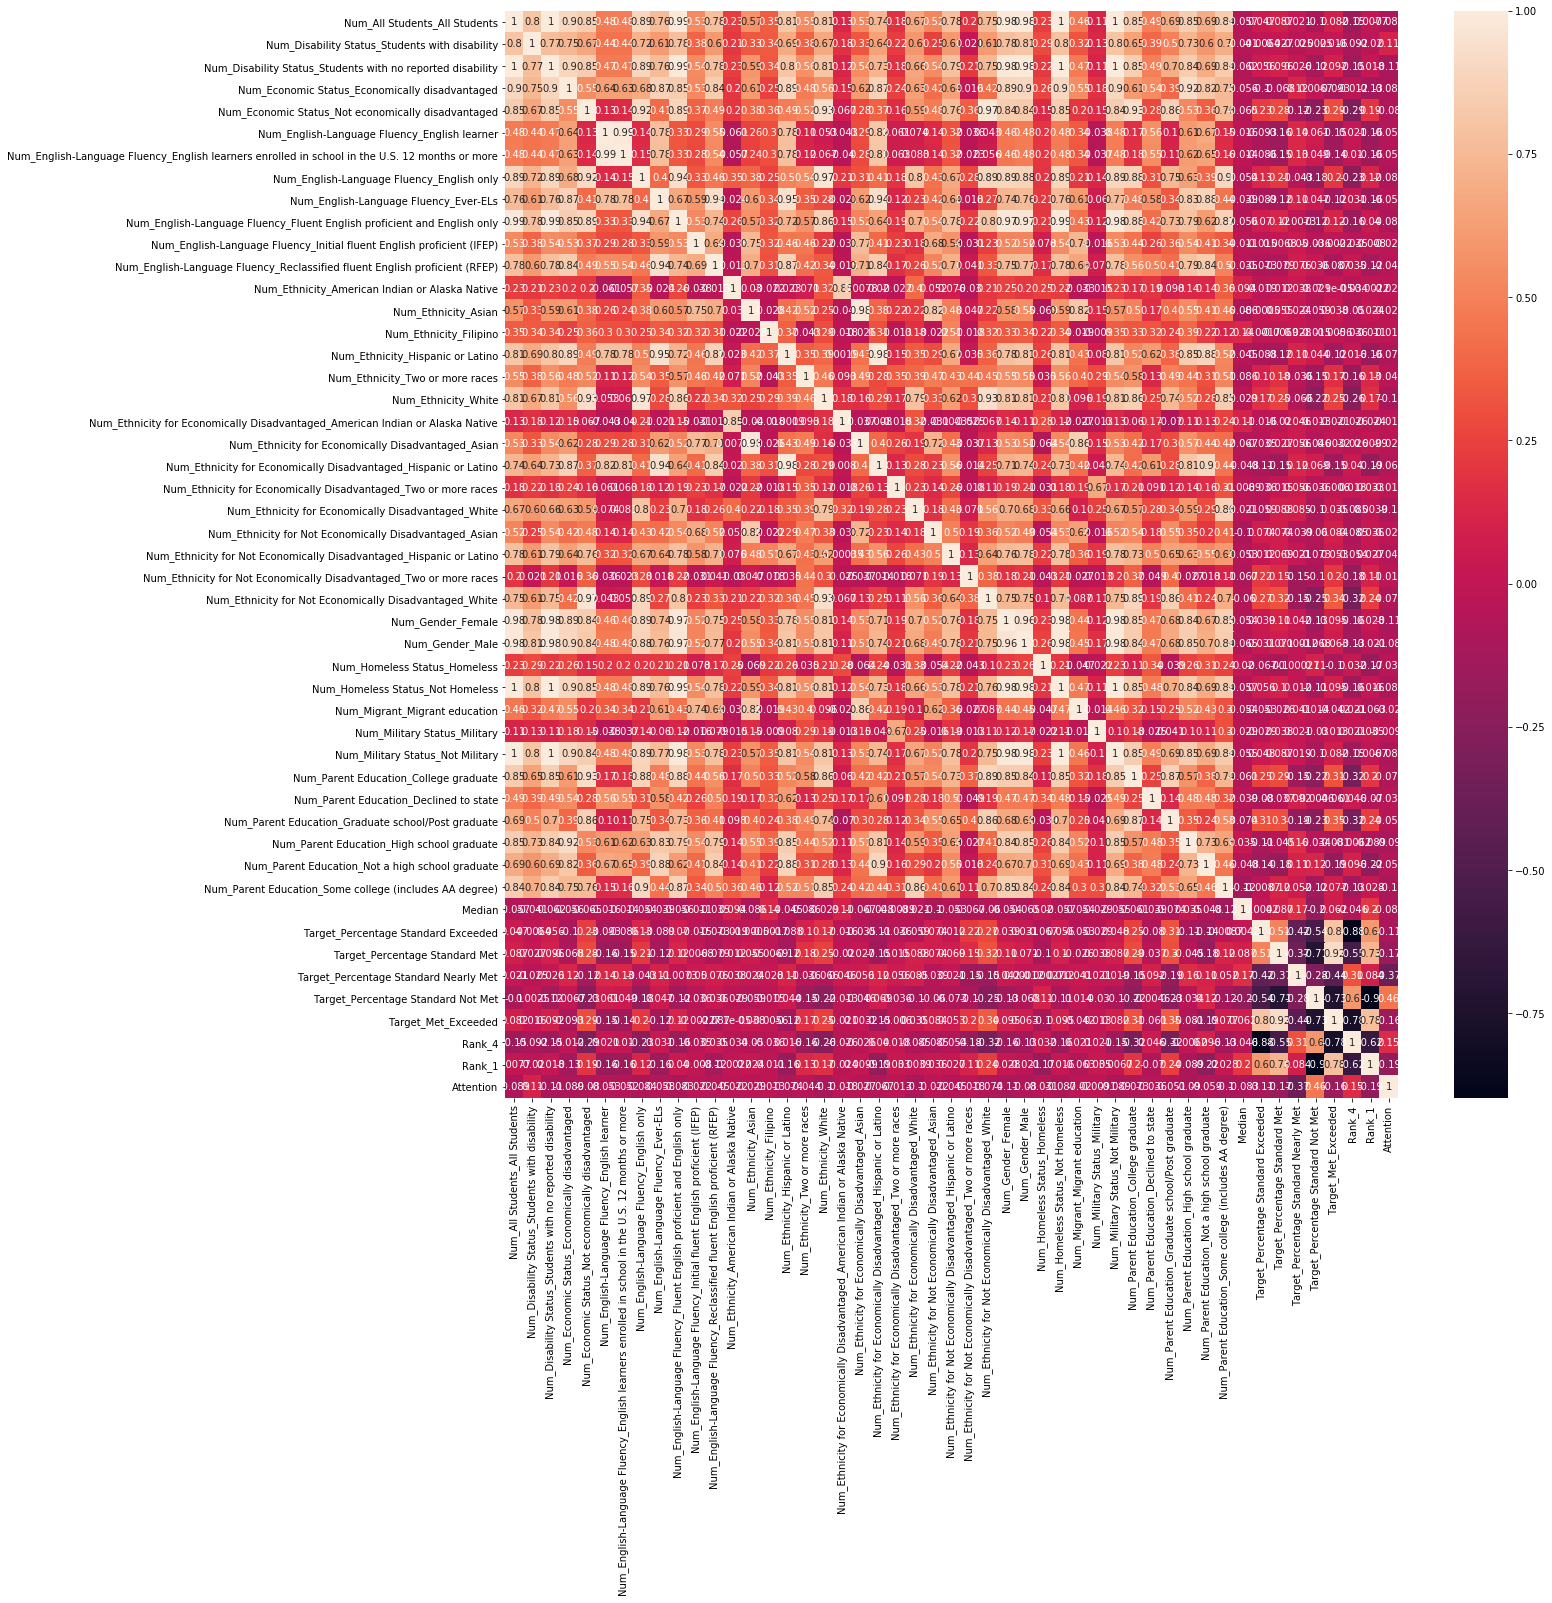

In [216]:
corr = X_num.corr()
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="rocket")

Correlation matrix of percentage variables with each other

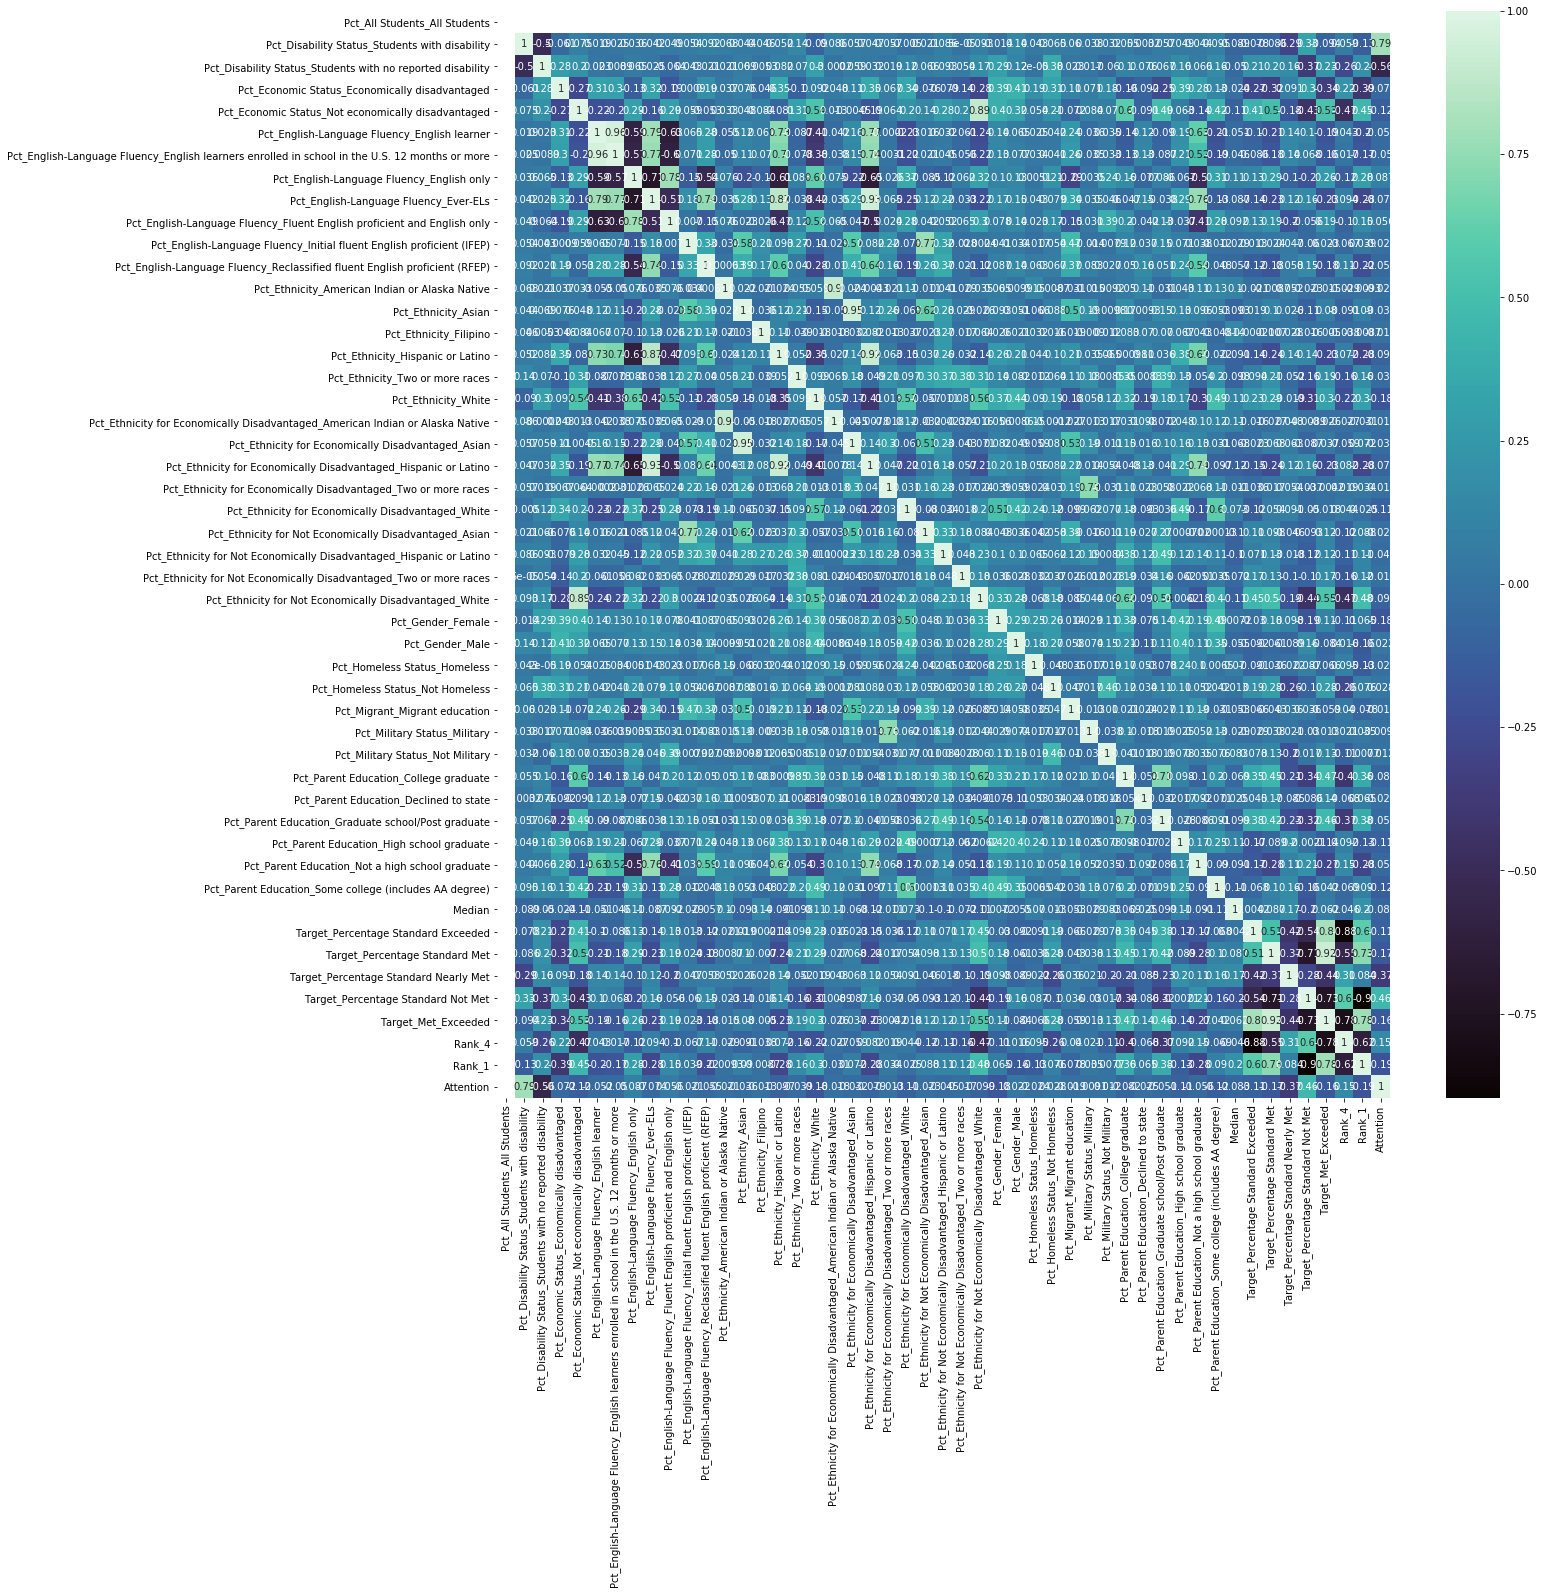

In [229]:
corr = X_pct.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_schools[corr.index].corr(), annot=True, cmap="mako")

### Feature Selection ###

In [254]:
X.columns

Index(['Num_All Students_All Students',
       'Num_Disability Status_Students with disability',
       'Num_Disability Status_Students with no reported disability',
       'Num_Economic Status_Economically disadvantaged',
       'Num_Economic Status_Not economically disadvantaged',
       'Num_English-Language Fluency_English learner',
       'Num_English-Language Fluency_English learners enrolled in school in the U.S. 12 months or more',
       'Num_English-Language Fluency_English only',
       'Num_English-Language Fluency_Ever-ELs',
       'Num_English-Language Fluency_Fluent English proficient and English only',
       'Num_English-Language Fluency_Initial fluent English proficient (IFEP)',
       'Num_English-Language Fluency_Reclassified fluent English proficient (RFEP)',
       'Num_Ethnicity_American Indian or Alaska Native', 'Num_Ethnicity_Asian',
       'Num_Ethnicity_Filipino', 'Num_Ethnicity_Hispanic or Latino',
       'Num_Ethnicity_Two or more races', 'Num_Ethnicity_Whi

We can use either a Random forest regressor or Extratrees regressor to find the feature importance ranking.

[5.79794899e-05 2.47012327e-04 1.19142172e-04 1.40189079e-04
 7.77791627e-04 4.57532800e-05 3.02245483e-05 6.67767889e-04
 6.77885632e-05 3.01152200e-04 2.20367370e-08 5.71392510e-05
 1.15075029e-06 9.98524134e-06 4.93505412e-10 2.76951432e-05
 9.78327481e-05 1.76077022e-04 3.86225633e-06 1.86733052e-06
 6.30756770e-05 2.14725352e-09 8.09447790e-05 3.88687804e-06
 1.13496982e-04 6.95483518e-05 5.84017323e-04 2.22339739e-04
 5.97833190e-04 2.85954070e-05 3.18227052e-04 1.15569612e-05
 0.00000000e+00 3.60772364e-04 3.66374262e-04 1.56397707e-04
 2.22923482e-04 8.03648068e-04 1.77402934e-04 2.79265169e-04
 0.00000000e+00 4.60985431e-05 3.62045974e-03 4.44157498e-03
 5.70566750e-03 1.01283366e-05 4.68713753e-05 3.54198136e-03
 4.57709855e-05 4.66335832e-03 1.32761004e-06 1.02888484e-04
 1.61699773e-06 6.94395332e-05 6.08070661e-07 3.76266350e-04
 4.34113855e-04 8.53102615e-03 1.85134950e-06 1.09332717e-05
 8.95307921e-05 1.09289110e-07 8.91496034e-05 1.46414962e-06
 1.05852798e-04 2.856471

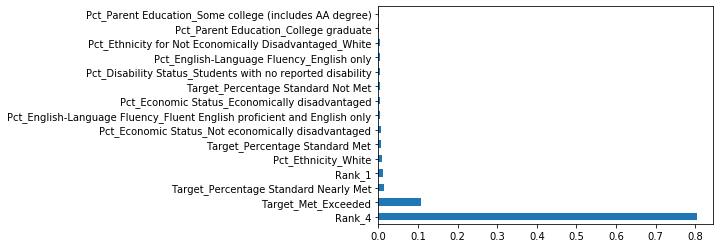

In [255]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

We notice that rank_4 is most important of all features (since this is derived from the feature itself) followed by Target that meets/exceeds the expectation followed by rank1 and percentage of ethinicity(white).

In [256]:
attr_important_features = feat_importances.nlargest(15).index.tolist()
attr_important_features

['Rank_4',
 'Target_Met_Exceeded',
 'Target_Percentage Standard Nearly Met',
 'Rank_1',
 'Pct_Ethnicity_White',
 'Target_Percentage Standard Met',
 'Pct_Economic Status_Not economically disadvantaged',
 'Pct_English-Language Fluency_Fluent English proficient and English only',
 'Pct_Economic Status_Economically disadvantaged',
 'Target_Percentage Standard Not Met',
 'Pct_Disability Status_Students with no reported disability',
 'Pct_English-Language Fluency_English only',
 'Pct_Ethnicity for Not Economically Disadvantaged_White',
 'Pct_Parent Education_College graduate',
 'Pct_Parent Education_Some college (includes AA degree)']

In [257]:
df_schools.to_csv("df_schools.csv", sep='\t', encoding='utf-8')

df_imp_features = pd.DataFrame(attr_important_features, columns=["feature"])
df_imp_features.to_csv("important_features.csv", sep='\t', encoding='utf-8')
